# PREDICTION OF DELHI AIR QUALITY USING LINEAR REGRESSION

# PURPOSE OF THE PROJECT

Air Quality Prediction is important for several reasons such as-
1. Protecting public health
2. Mitigating environmental damage
3. Supporting urban planning
4. Improving energy efficiency

# HERE "pm10" WILL BE THE TARGET VALUE FOR WHICH WE ARE DOING THE PREDICTION

# Now!!! What is "PM10"?

"PM10" refers to particulate matter with a diameter of 10 micrometers or less. It is a type of air pollution that consists of tiny particles such as dust, dirt, soot, and smoke that can be inhaled into the lungs and cause various health problems. PM10 is considered a major air pollutant and is regulated by many countries to protect public health. Sources of PM10 include vehicle exhaust, industrial processes, and natural phenomena such as dust storms.

<b> Importing of python packages </b>

In [1]:
import pandas as pd #use for working with datasets
import numpy as np #use to provide array objects
import matplotlib.pyplot as plt #use to make interactive visualizations 
import seaborn as sns #use to plot functions operated on dataframes and arrays

<b> Reading of dataset </b>

In [2]:
air_quality = pd.read_csv("D://Data_Science//data and image//delhi_aqi.csv", index_col=0)
air_quality

,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...
2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54


<b> Displaying the First 10 Data </b>

In [3]:
air_quality.head(10)

,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
2020-11-25 06:00:00,3898.62,28.39,117.90,40.05,101.09,437.25,511.79,42.05
2020-11-25 07:00:00,1949.31,14.53,105.56,83.69,185.01,312.76,349.20,12.79
2020-11-25 08:00:00,1508.71,11.62,112.41,87.98,217.44,275.53,303.47,6.59
2020-11-25 09:00:00,1361.85,7.04,109.67,95.84,213.62,263.51,289.86,6.02


<b> Displaying Dimensions of the originial dataframe </b>

In [4]:
air_quality.shape #find dimensions of the dataframe

(18776, 8)

<b> Displaying the data types </b>

In [5]:
air_quality.dtypes #describes how many types of data are present in the dataframe

co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

<b> Checking of null value </b>

In [6]:
air_quality.info() #checking the presence of null-value

<class 'pandas.core.frame.DataFrame'>
Index: 18776 entries, 2020-11-25 01:00:00 to 2023-01-24 08:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      18776 non-null  float64
 1   no      18776 non-null  float64
 2   no2     18776 non-null  float64
 3   o3      18776 non-null  float64
 4   so2     18776 non-null  float64
 5   pm2_5   18776 non-null  float64
 6   pm10    18776 non-null  float64
 7   nh3     18776 non-null  float64
dtypes: float64(8)
memory usage: 1.3+ MB


<b> Detection of Missing Values </b>

In [7]:
air_quality.isna().sum().to_frame()

,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


<b> Growth of pm10 in a daily manner (date wise) </b>

<AxesSubplot:xlabel='date', ylabel='pm10'>

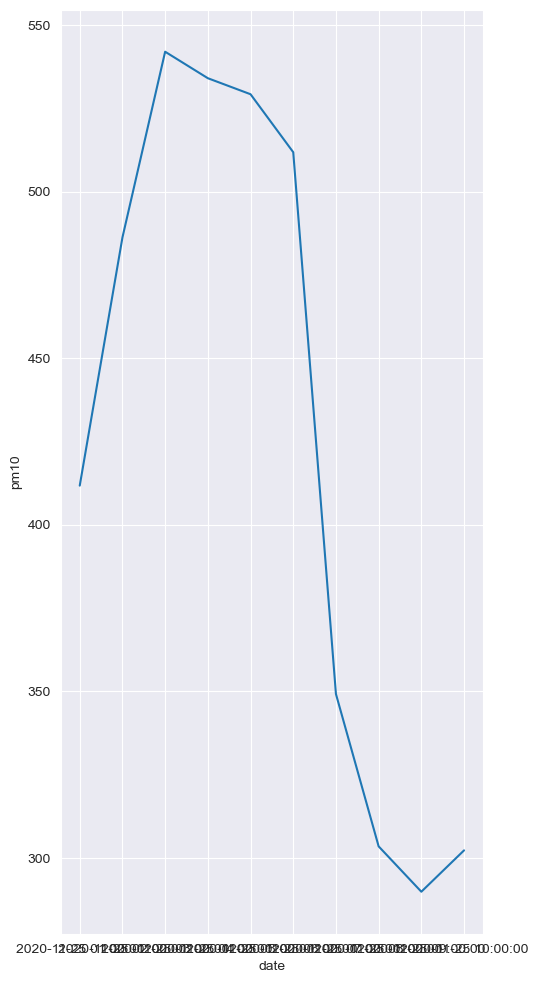

In [8]:
plt.figure(figsize=(12, 12))
sns.set_style("darkgrid")
plt.subplot(121)
sns.lineplot(data=air_quality.head (10), x="date", y="pm10")

The graph is highly inconclusive as there is major fluctuation

<b> Executing Correlation and displaying it through colormap </b>

In [9]:
air_quality.corr().style.background_gradient(cmap="YlOrBr")

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.914129,0.764201,-0.402284,0.534227,0.936830,0.950218,0.784951
no,0.914129,1.000000,0.557712,-0.354905,0.498719,0.816441,0.829910,0.724342
no2,0.764201,0.557712,1.000000,-0.343609,0.710371,0.701840,0.711998,0.718399
o3,-0.402284,-0.354905,-0.343609,1.000000,0.013204,-0.286661,-0.294825,-0.275983
so2,0.534227,0.498719,0.710371,0.013204,1.000000,0.488476,0.491889,0.628444
pm2_5,0.936830,0.816441,0.701840,-0.286661,0.488476,1.000000,0.989291,0.644446
pm10,0.950218,0.829910,0.711998,-0.294825,0.491889,0.989291,1.000000,0.686081
nh3,0.784951,0.724342,0.718399,-0.275983,0.628444,0.644446,0.686081,1.000000


<b> Heat Map Visualization of Correlation Matrix </b>

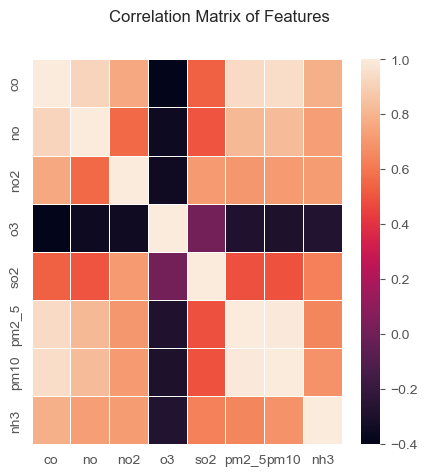

In [10]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
sns.heatmap(data=air_quality.corr(),
 annot=False,
 linewidth=.6)
plt.suptitle("Correlation Matrix of Features")
plt.show()

<b> Displaying the graphical representation of "pm10" using histogram </b>

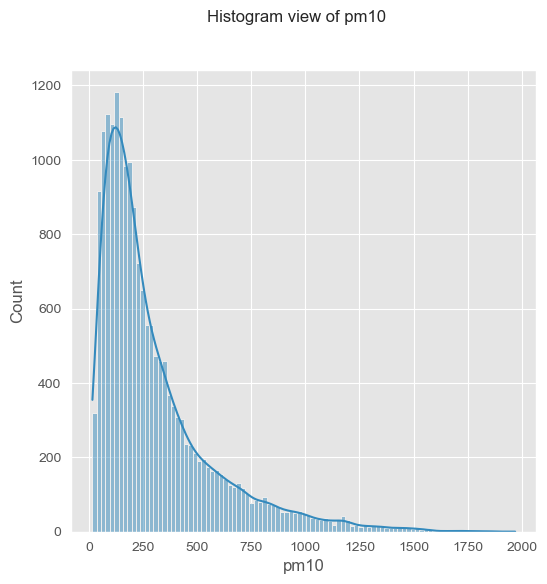

In [11]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")
sns.histplot(data=air_quality, x="pm10",
 kde=True,
 linewidth=.7)
plt.suptitle("Histogram view of pm10")
plt.show()

<b> Displaying the graphical representation of "pm10" using Boxplot </b>

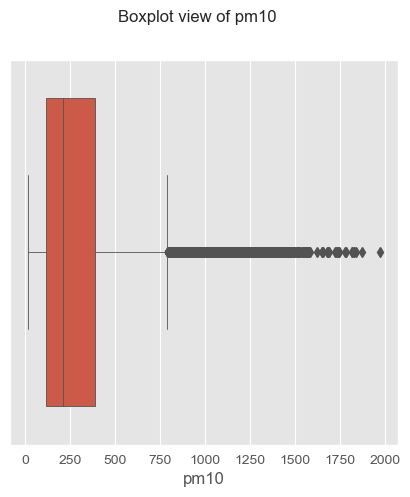

In [12]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
sns.boxplot(data=air_quality, x="pm10",
 linewidth=.6)
plt.suptitle("Boxplot view of pm10")
plt.show()

<b> Visualization of "pm 10" Distribution and Spread using Histogram and Box Plot </b>

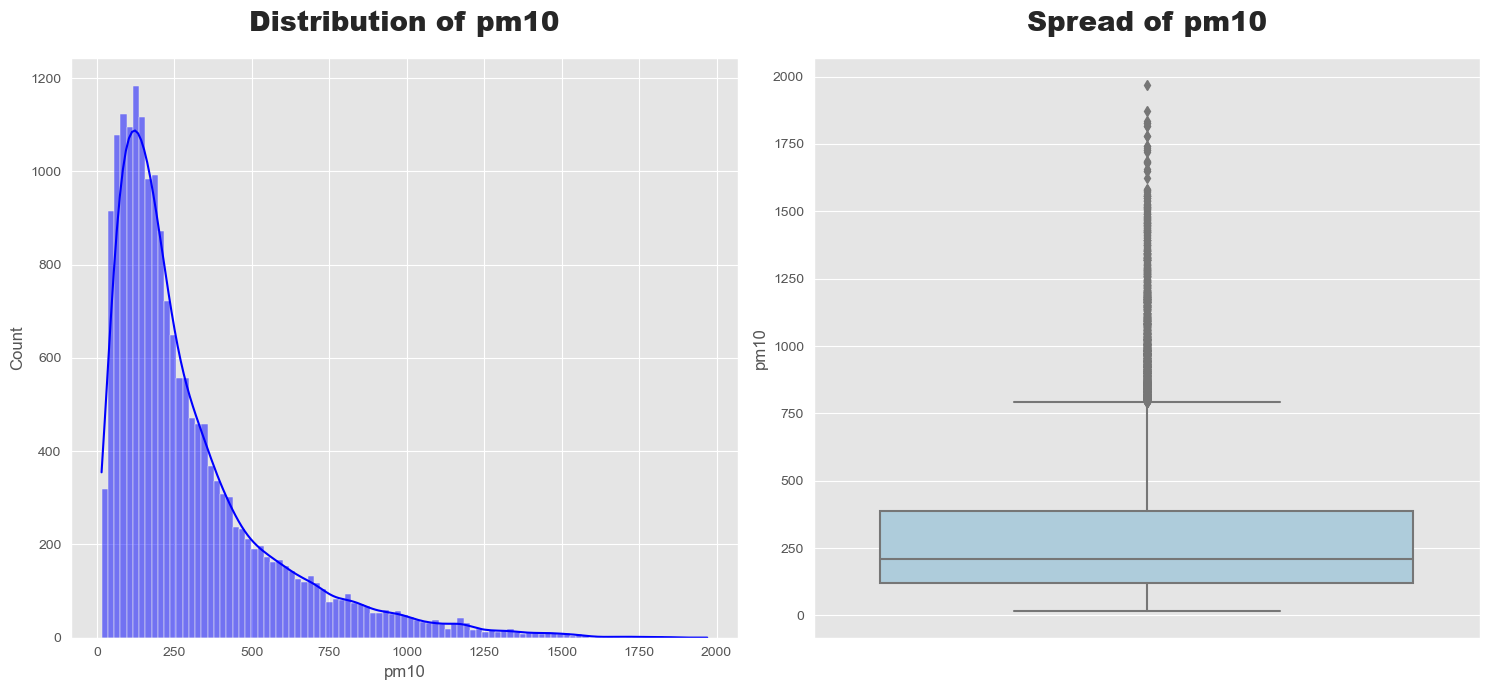

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(air_quality["pm10"],color="blue",kde=True)
plt.title("Distribution of pm10",fontweight="black",pad=20,fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(y=air_quality["pm10"],palette="Paired")
plt.title("Spread of pm10",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

<b> Description of the column "pm10"

In [14]:
air_quality.pm10.describe()

count    18776.000000
mean       300.092966
std        267.165827
min         15.070000
25%        118.797500
50%        209.705000
75%        387.965000
max       1969.930000
Name: pm10, dtype: float64

<b> Find the IQR

In [15]:
percentile25 = air_quality['pm10'].quantile(0.25)
percentile75 = air_quality['pm10'].quantile(0.75)

<b> Displaying the percentile (25 & 75)

In [16]:
percentile25

118.7975

In [17]:
percentile75

387.96500000000003

<b> Value of IQR

In [18]:
iqr = percentile75 - percentile25
iqr

269.1675

<b> Calculation of Upper Limit and Lower Limit

In [19]:
Upper_limit = percentile75 + 1.5 * iqr
Lower_limit = percentile25 - 1.5 * iqr

<b> Displaying of both Upper & Lower Limit

In [20]:
print("Upper limit", Upper_limit)
print("Lower limit", Lower_limit)

Upper limit 791.7162500000001
Lower limit -284.95375


<b> Finding the Outliers

In [21]:
air_quality[air_quality['pm10'] > Upper_limit]

,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,,,,,,,,
2020-11-30 16:00:00,9292.60,134.11,137.09,0.0,84.88,656.52,833.60,73.97
2020-11-30 17:00:00,9399.41,135.90,120.64,0.0,78.20,703.33,887.84,57.25
2020-11-30 18:00:00,8758.55,128.75,102.82,0.0,61.99,669.44,844.63,37.49
2020-12-01 14:00:00,10147.09,150.20,213.86,0.0,117.30,700.36,866.48,97.28
2020-12-01 15:00:00,10040.28,130.53,197.41,0.0,97.28,752.66,937.40,88.16
...,...,...,...,...,...,...,...,...
2023-01-23 15:00:00,12817.38,293.26,175.48,0.0,165.94,929.07,1172.44,101.33
2023-01-23 16:00:00,11535.65,232.46,159.03,0.0,131.61,898.65,1134.58,83.09
2023-01-23 17:00:00,10147.09,187.76,135.72,0.0,109.67,846.32,1078.50,74.98


In [22]:
air_quality[air_quality['pm10'] < Lower_limit]

,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,,,,,,,,


<b> Trimming

In [23]:
air_qual = air_quality[air_quality['pm10'] < Upper_limit]

In [24]:
air_qual.shape

(17531, 8)

<b> Comparison of the data

C:\Users\RISHAB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHAB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


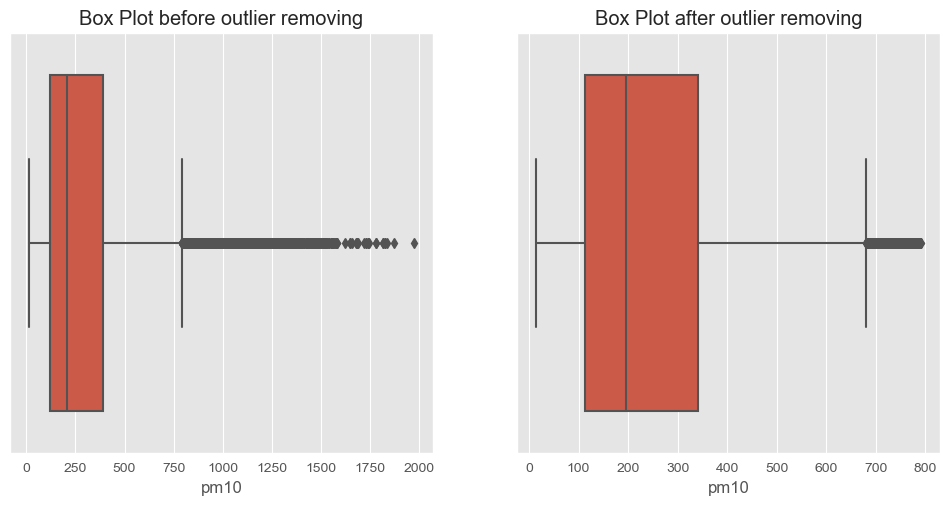

In [26]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(air_quality['pm10'])
plt.title("Box Plot before outlier removing")

plt.subplot(2,2,2)
sns.boxplot(air_qual['pm10'])
plt.title("Box Plot after outlier removing")
plt.show()

<b> Displaying of Skew Value </b>

In [28]:
air_qual.pm10.skew()

1.0737282950614748

# Variation of "pm10" using Lineplot

<b> pm10 vs co </b>

<AxesSubplot:xlabel='co', ylabel='pm10'>

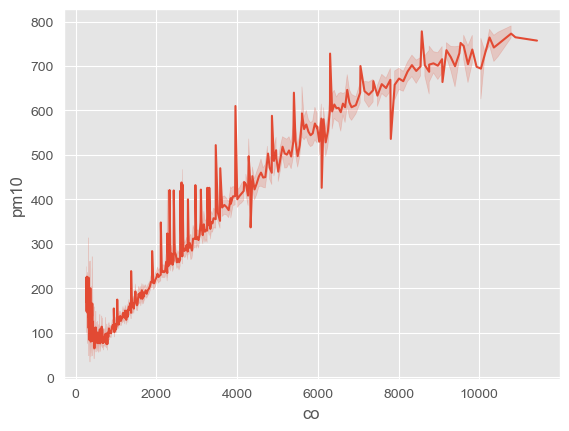

In [29]:
sns.lineplot(data=air_qual, y="pm10", x="co")

The graph is conclusive as increament of co increases the rate of pm10

<b> pm10 vs no </b>

<AxesSubplot:xlabel='no', ylabel='pm10'>

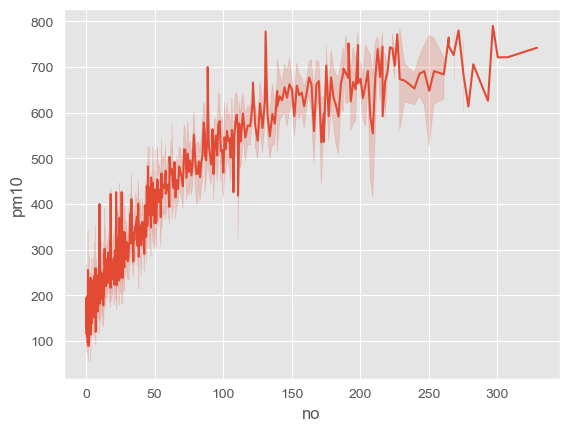

In [30]:
sns.lineplot(data=air_qual, y="pm10", x="no")

The graph is conclusive as increament of no increases the rate of pm10

<b> pm10 vs no2 </b>

<AxesSubplot:xlabel='no2', ylabel='pm10'>

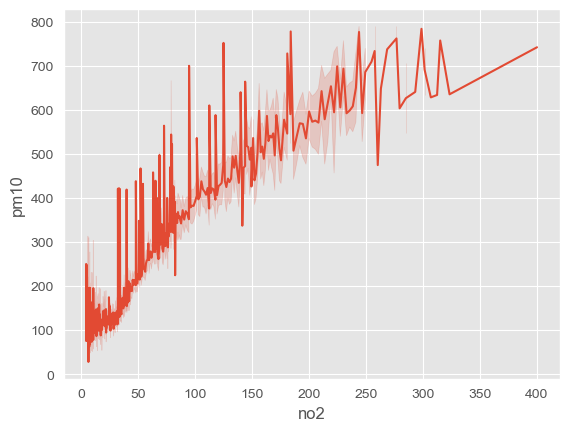

In [31]:
sns.lineplot(data=air_qual, y="pm10", x="no2")

The graph is conclusive as increament of no2 increases the rate of pm10

<b> pm10 vs o3 </b>

<AxesSubplot:xlabel='o3', ylabel='pm10'>

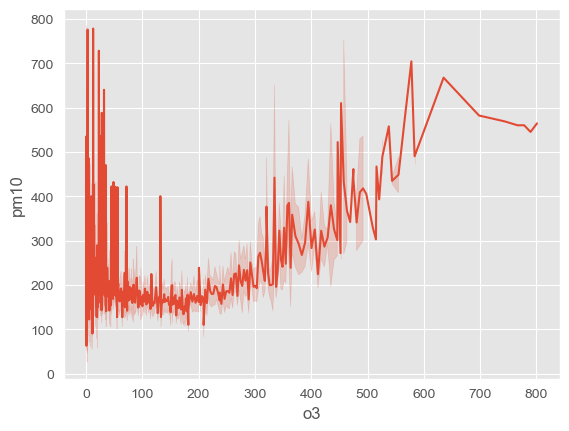

In [32]:
sns.lineplot(data=air_qual, y="pm10", x="o3")

The graph is conclusive as increament of o3 in atmosphere increases the rate of pm10

<b> pm10 vs so2 </b>

<AxesSubplot:xlabel='so2', ylabel='pm10'>

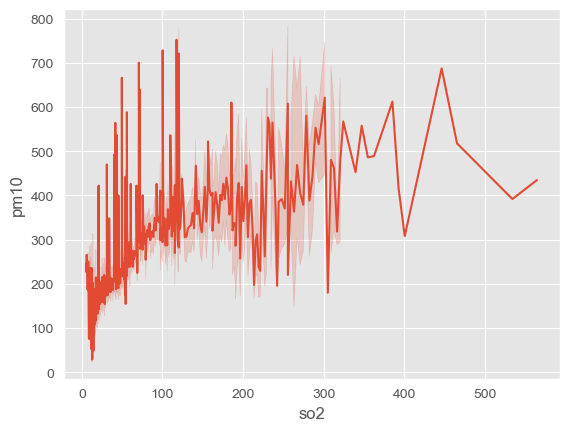

In [33]:
sns.lineplot(data=air_qual, y="pm10", x="so2")

The graph is conclusive as increament of so2 creates high occurence of pm10

<b> pm10 vs pm2_5 </b>

<AxesSubplot:xlabel='pm2_5', ylabel='pm10'>

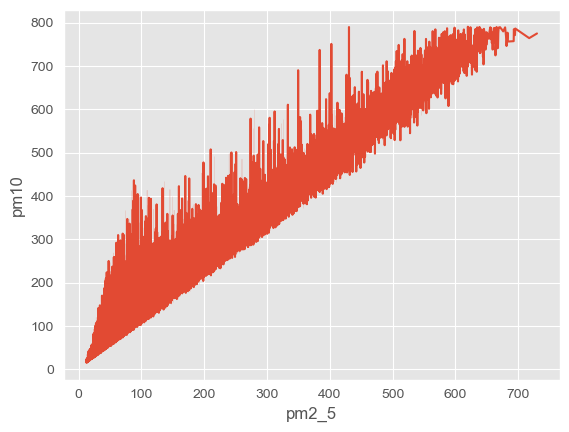

In [34]:
sns.lineplot(data=air_qual, y="pm10", x="pm2_5")

The graph is highly conclusive as increament of pm2_5 (Fine Particulate Matter) creates high occurence of pm10

<b> pm10 vs nh3 </b>

<AxesSubplot:xlabel='nh3', ylabel='pm10'>

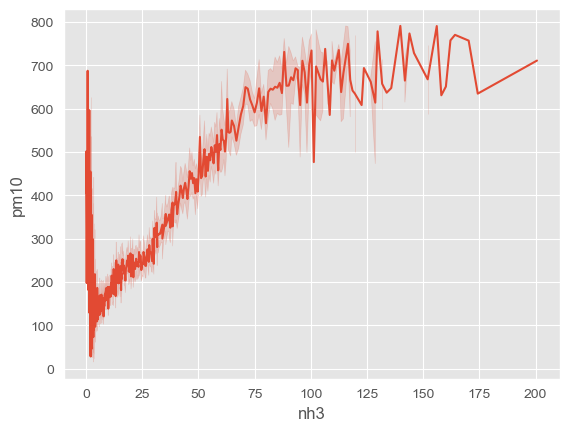

In [35]:
sns.lineplot(data=air_qual, y="pm10", x="nh3")

The graph is highly conclusive as increament of nh3 creates high occurence of pm10

# Visualization using Pair Plot

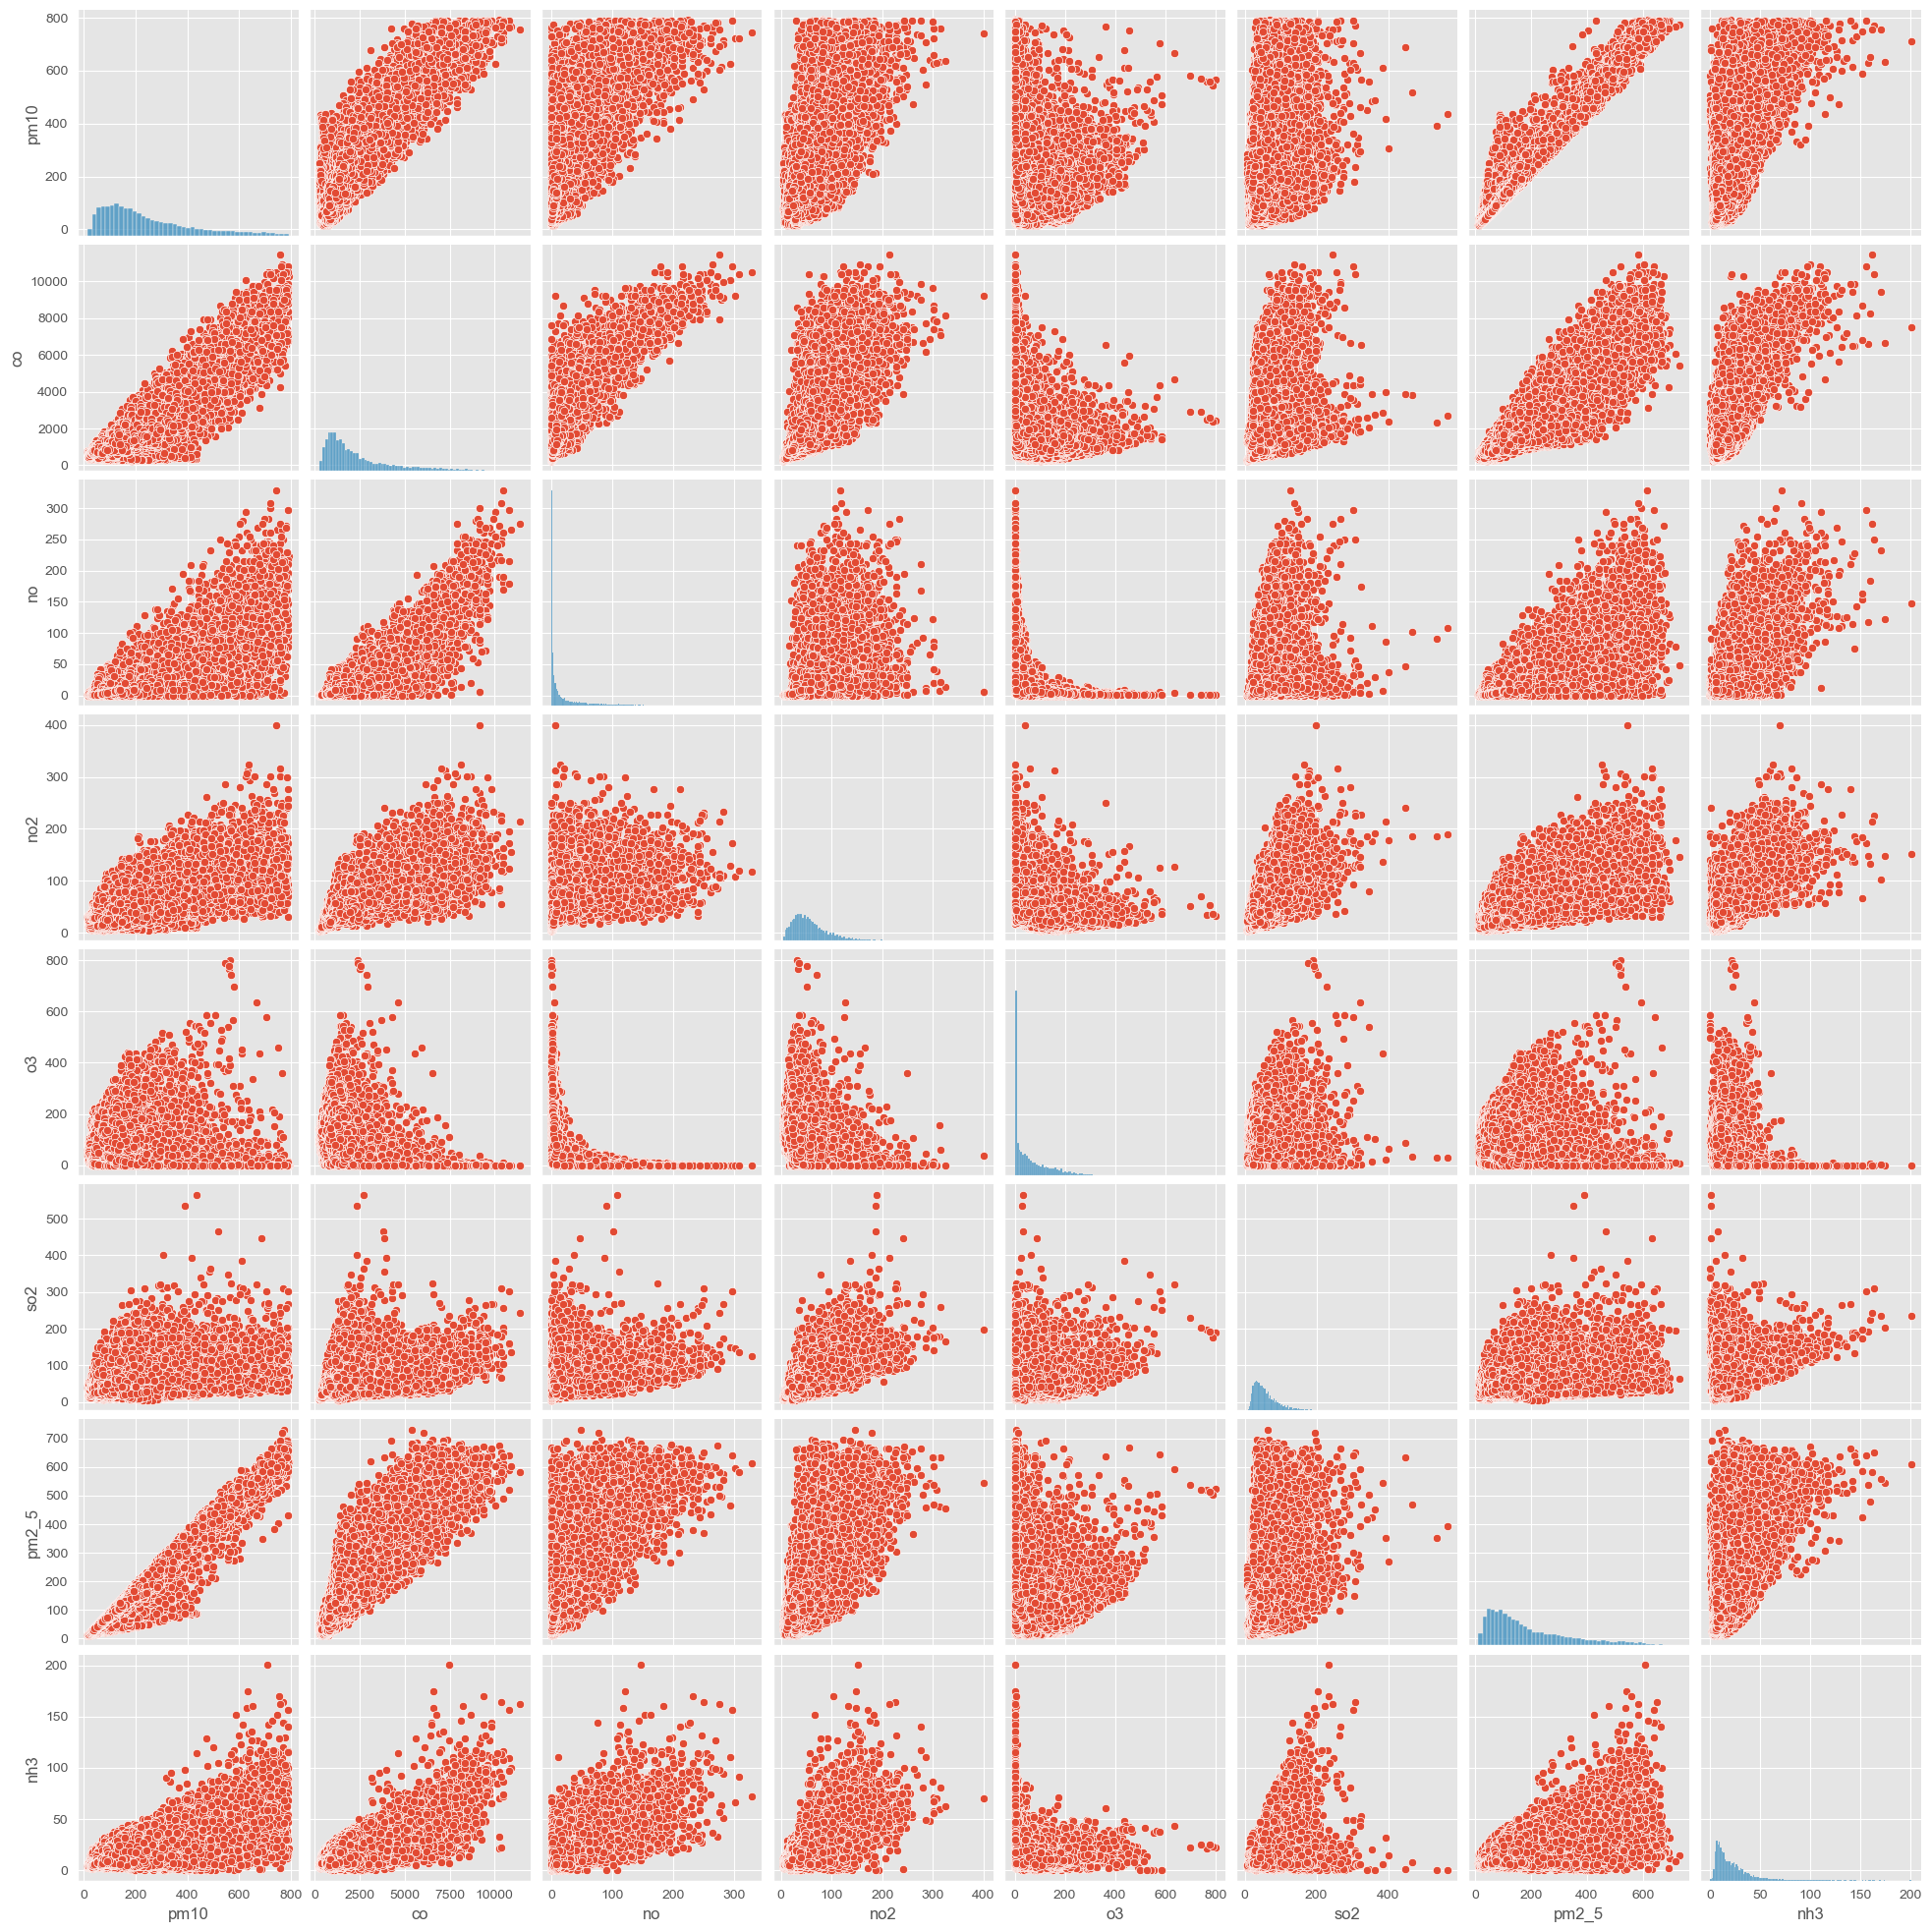

In [36]:
sns.pairplot(air_qual[['pm10',
                         'co',
                         'no',
                         'no2',
                         'o3',
                         'so2',
                        'pm2_5', 
                       'nh3']])

<b> Splitting of dataset and selecting both target and features </b>

In [37]:
Y = air_qual["pm10"] #target
X = air_qual.drop(['pm10'],axis=1)

<b> Displaying of Featured Data (X) </b>

In [38]:
X

,co,no,no2,o3,so2,pm2_5,nh3
date,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,28.63
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,41.04
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,49.14
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,48.13
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,46.61
...,...,...,...,...,...,...,...
2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,6.27
2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,9.12
2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,12.54


<b> Displaying of Target Data (Y) </b>

In [39]:
Y

date
2020-11-25 01:00:00    411.73
2020-11-25 02:00:00    486.21
2020-11-25 03:00:00    541.95
2020-11-25 04:00:00    534.00
2020-11-25 05:00:00    529.19
                        ...  
2023-01-24 04:00:00    289.84
2023-01-24 05:00:00    280.52
2023-01-24 06:00:00    296.07
2023-01-24 07:00:00    191.82
2023-01-24 08:00:00    140.26
Name: pm10, Length: 17531, dtype: float64

# Using of scikit-learn for predictive data analysis

Scikit-learn is a popular machine learning library for Python that provides a wide range of
tools and algorithms for building predictive models. Its purpose is to provide a user-friendly
and efficient platform for implementing various machine learning techniques, including
classification, regression, clustering, and dimensionality reduction

<b> Splitting of dataset using sklearn model </b>

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, 
                                                   Y,
                                                   test_size=0.20,
                                                   random_state=0)

<b> Printing the shape of Train & Test Data </b>

In [41]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (14024, 7)
X_test shape: (3507, 7)
Y_train shape: (14024,)
Y_test shape: (3507,)


<b> Visualization of Train Value (X_train)

In [42]:
X_train

,co,no,no2,o3,so2,pm2_5,nh3
date,,,,,,,
2022-03-26 10:00:00,480.65,0.69,7.03,174.52,15.97,62.32,12.16
2022-06-10 05:00:00,480.65,1.87,13.54,128.75,25.03,66.25,10.89
2022-03-24 07:00:00,514.03,1.69,12.17,161.65,25.27,52.90,9.63
2022-05-11 22:00:00,894.55,0.00,19.36,107.29,35.29,90.15,21.53
2022-04-14 03:00:00,7797.24,177.03,90.48,4.78,144.96,414.71,76.00
...,...,...,...,...,...,...,...
2022-01-17 01:00:00,4005.43,36.66,74.71,0.01,42.92,471.84,11.91
2022-07-08 15:00:00,2857.21,2.40,111.04,5.05,85.83,135.40,40.53
2022-02-18 04:00:00,8224.49,187.75,106.93,6.26,84.88,601.21,36.48


<b> Mean Value of X_train </b>

In [43]:
X_train.mean()

co       2365.680220
no         22.294157
no2        59.662384
o3         64.501668
so2        61.527697
pm2_5     192.593970
nh3        21.167922
dtype: float64

<b> Standard Deviation (Std) Value of X_train </b>

In [44]:
X_train.std()

co       1898.111542
no         39.696139
no2        38.929847
o3         81.430923
so2        40.817702
pm2_5     147.544152
nh3        17.153367
dtype: float64

<b> Visualization of Test Value (X_test) </b>

In [45]:
X_test

,co,no,no2,o3,so2,pm2_5,nh3
date,,,,,,,
2022-04-28 19:00:00,3017.43,19.22,76.09,0.02,78.20,147.85,32.42
2022-03-12 13:00:00,1615.52,0.71,69.92,61.51,44.35,83.11,22.04
2022-05-16 13:00:00,1081.47,0.10,47.30,183.11,65.80,127.99,17.48
2022-04-19 23:00:00,1575.47,1.63,50.72,4.38,59.13,114.21,26.35
2021-04-27 15:00:00,5821.23,64.37,122.01,0.00,141.14,289.18,72.96
...,...,...,...,...,...,...,...
2021-09-24 23:00:00,1028.06,1.79,29.47,2.55,31.95,57.01,5.19
2021-08-03 19:00:00,894.55,0.00,35.30,45.06,50.07,75.54,5.70
2021-12-09 00:00:00,2723.69,25.70,43.87,0.00,29.33,251.03,10.13


<b> Mean Value of X_test </b>

In [46]:
X_test.mean()

co       2422.840402
no         22.834750
no2        60.789307
o3         63.332227
so2        61.962415
pm2_5     196.170160
nh3        21.590841
dtype: float64

<b> Standard Deviation (Std) Value of X_test </b>

In [47]:
X_test.std()

co       1944.357780
no         40.150876
no2        39.394656
o3         81.933702
so2        42.520368
pm2_5     150.095689
nh3        17.738075
dtype: float64

# Aim of Standard Scaler

The purpose of StandardScaler in Python is to standardize the features (i.e., the columns) of
a dataset by subtracting the mean and dividing by the standard deviation. This is a common
preprocessing step in machine learning and data analysis, as it can help to normalize the
data and improve the performance of certain algorithms.

In [48]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

<b> Visualizing the data (for train) </b>

In [49]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

<b> Visualizing the data (for test)

In [50]:
X_test_scaled.std(axis=0)

array([1.0242548 , 1.01134729, 1.01183144, 1.00606672, 1.04160252,
       1.0171846 , 1.03397647])

<b> Importing and Fitting the model on the training data

In [51]:
from sklearn.linear_model import LinearRegression

<b> Defining the model

In [52]:
air_qual_model = LinearRegression()

<b> Fitting the model on training data

In [53]:
air_qual_model.fit(X_train, Y_train)

LinearRegression()

<b> Checking the slope, m, and the intercept, c

In [54]:
m = air_qual_model.coef_
c = air_qual_model.intercept_
m, c

(array([ 0.01697689, -0.14159434, -0.15519611,  0.05768425, -0.08734292,
         0.98868747,  0.84103885]),
 12.264992025067642)

# Target Prediction: "pm10" against the predictors in the training and testing dataset

<b> Predictions on the training data

In [55]:
Y_predictions_train = air_qual_model.predict(X_train)

In [56]:
Y_predictions_train

array([ 99.75042967,  97.95890916,  86.38186626, ..., 726.74912695,
       243.29075653, 105.04225273])

<b> Predictions on the testing data

In [57]:
Y_predictions_test = air_qual_model.predict(X_test)

In [58]:
Y_predictions_test

array([215.57611409, 129.12046511, 169.32892086, ..., 302.20552162,
        61.23426924, 301.47322965])

<b> Comparison with the original data

In [59]:
Y_test.head(100)

date
2022-04-28 19:00:00    242.73
2022-03-12 13:00:00    122.28
2022-05-16 13:00:00    303.08
2022-04-19 23:00:00    182.43
2021-04-27 15:00:00    463.02
                        ...  
2021-03-30 07:00:00    224.13
2021-11-12 09:00:00    176.38
2022-09-23 23:00:00     51.15
2021-08-11 06:00:00     85.55
2023-01-03 10:00:00    225.43
Name: pm10, Length: 100, dtype: float64

<b> Displaying Mean Square Error

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

<b> Validation of the data

<b> Mean squared error between Y_test and Y_predictions_test

In [62]:
mean_squared_error(Y_test, Y_predictions_test)

957.5067341955759

<b> Mean squared error between Y_train and Y_predictions_train

In [63]:
mean_squared_error(Y_train, Y_predictions_train)

1076.6119360254916

<b> Printing Mean Absolute Error

In [64]:
from sklearn.metrics import mean_absolute_error, r2_score

<b> Mean Absolute Error Between Y_test and Y_prediction_test

In [65]:
mean_absolute_error(Y_test, Y_predictions_test)

19.099519010207178

<b> Mean Absolute Error Between Y_train and Y_predictions_train

In [66]:
mean_absolute_error(Y_train, Y_predictions_train)

19.752783883975052

<b> Printing the accuracy of the testing data

In [67]:
accuracy = r2_score(Y_test, Y_predictions_test)
print(f"The Model has an accuracy of {accuracy*100:.2f}%")

The Model has an accuracy of 97.03%


<b> Printing the accuracy of the training data

In [68]:
accuracy = r2_score(Y_train, Y_predictions_train)
print(f"The Model has an accuracy of {accuracy*100:.2f}%")

The Model has an accuracy of 96.52%


<b> Coefficient Determination

In [69]:
r2score_train= r2_score(Y_train, Y_predictions_train)
r2score_train

0.9651539507097686

In [70]:
r2score_test= r2_score(Y_test, Y_predictions_test)
r2score_test

0.9702940159072267

<b> Plotting the graph of Regression

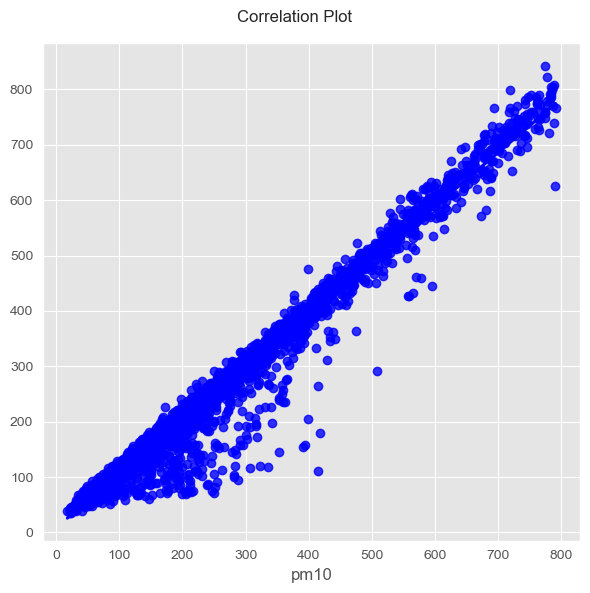

In [72]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
sns.regplot(x=Y_test, y=Y_predictions_test, ci=None, color="b")
plt.suptitle("Correlation Plot")
plt.tight_layout()
plt.show()

<b> Displaying of Actual, Predicted & Error

In [73]:
air_qual = pd.DataFrame({"Actual": Y_test,
                         "Predicted":Y_predictions_test,
                         "Error": abs(Y_test-Y_predictions_test)})
air_qual.head().style.background_gradient(cmap="YlOrBr")

,Actual,Predicted,Error
date,,,
2022-04-28 19:00:00,242.730000,215.576114,27.153886
2022-03-12 13:00:00,122.280000,129.120465,6.840465
2022-05-16 13:00:00,303.080000,169.328921,133.751079
2022-04-19 23:00:00,182.430000,161.076667,21.353333
2021-04-27 15:00:00,463.020000,417.984727,45.035273


In [74]:
air_qual.Error.describe()

count    3507.000000
mean       19.099519
std        24.349213
min         0.015630
25%         7.503831
50%        13.649879
75%        20.914995
max       303.066981
Name: Error, dtype: float64

<b> Visualization of Actual, Predicted & Error Value for "pm10" through Pair Plot

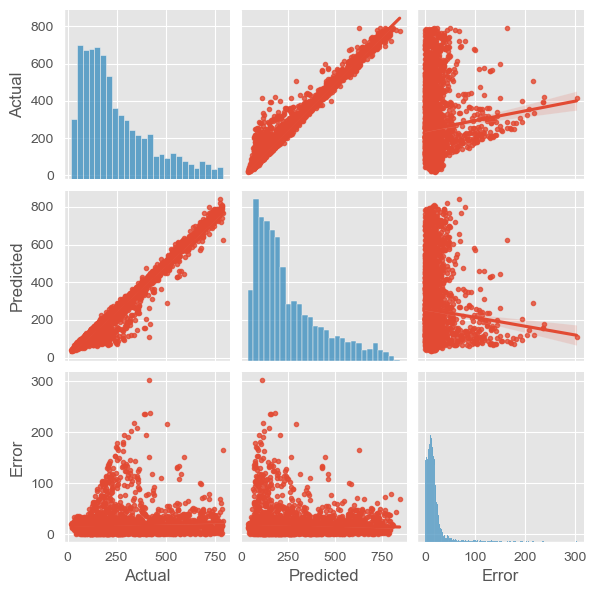

In [75]:
sns.pairplot(air_qual.iloc[0:], kind="reg", height=2, markers=".")

<b> Visualization of Actual vs Predicted Value of "pm10"

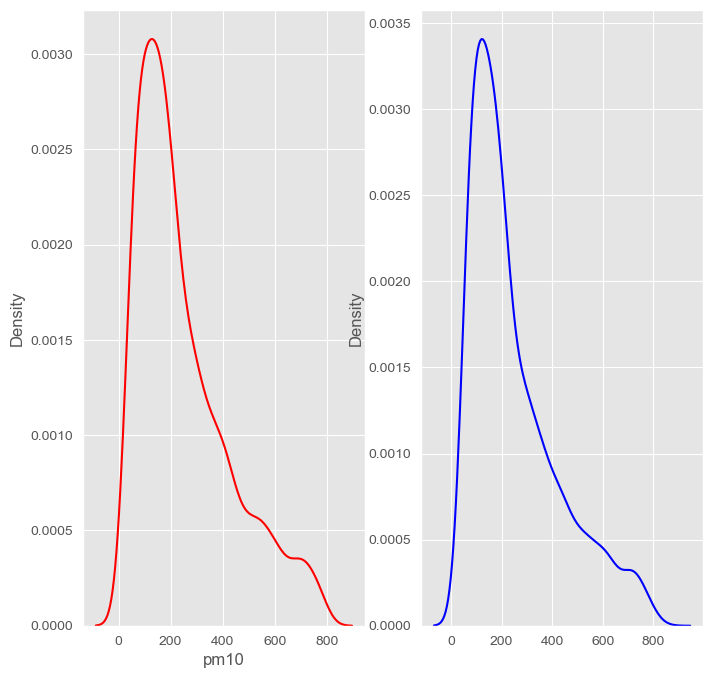

In [76]:
plt.figure(figsize=(8,8))
plt.subplot(121)
sns.kdeplot(Y_test, color="r", label="Actual Value")
plt.subplot(122)
sns.kdeplot(Y_predictions_test, color="blue", label="Predicted Values")
plt.show()
plt.close()

<b> Scatter plot between Actual & Predicted Value

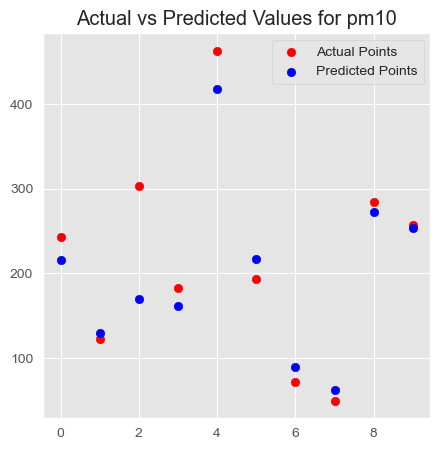

In [79]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.scatter(x=range(10),
 y=Y_test.head(10),
 color="r",
 label="Actual Points")
plt.scatter(x=range(10),
 y=Y_predictions_test[:10],
 color="b",
 label="Predicted Points")
plt.title('Actual vs Predicted Values for pm10')
plt.legend()

<b> Dataframe of actual and predicted "pm10"

In [80]:
Air_Qual=pd.DataFrame({
 "Actual Occurence":Y_test,
 "Predicted Occurence": Y_predictions_test
})
print(Air_Qual)

                     Actual Occurence  Predicted Occurence
date                                                      
2022-04-28 19:00:00            242.73           215.576114
2022-03-12 13:00:00            122.28           129.120465
2022-05-16 13:00:00            303.08           169.328921
2022-04-19 23:00:00            182.43           161.076667
2021-04-27 15:00:00            463.02           417.984727
...                               ...                  ...
2021-09-24 23:00:00             73.78            82.977723
2021-08-03 19:00:00             86.11            99.678612
2021-12-09 00:00:00            297.91           302.205522
2022-06-15 14:00:00             70.01            61.234269
2021-01-23 10:00:00            283.09           301.473230

[3507 rows x 2 columns]
